<a href="https://colab.research.google.com/github/KolipakaRamesh/AIML_Practice_Excercises/blob/main/Week5_Day5_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5, Day 5: Transformers and Attention Mechanisms

## Learning Objectives
- Understand attention mechanisms
- Learn transformer architecture
- Master self-attention concepts
- Practice implementing transformers

## Topics Covered
1. Attention Mechanisms
2. Transformer Architecture
3. Self-Attention
4. Practical Applications

In [8]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, MultiHeadAttention, LayerNormalization
from tensorflow.keras.models import Model

## 1. Attention Mechanisms

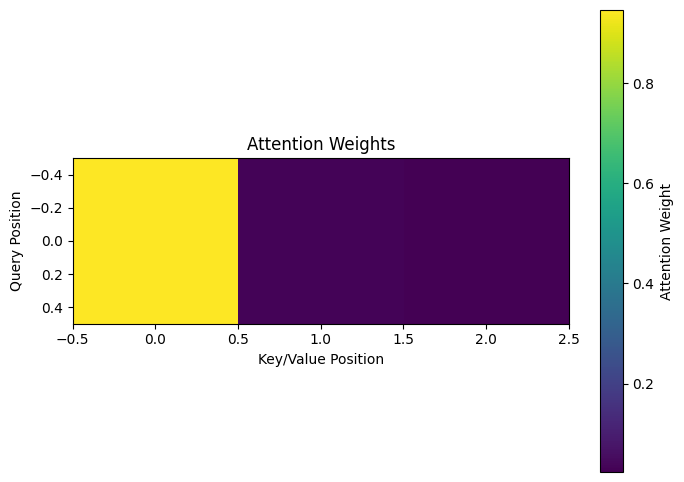

Query:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]]

key:
[[-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]
alue:
[[-1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358  0.37569802]]

Attention Weights:
[[0.94576623 0.03077135 0.02346242]]

Output:
[[-0.92557402  0.29285959 -0.88370567 -1.37073578]]


In [9]:
def visualize_attention():
    # Simple attention example
    def attention(query, key, value):
        # Compute attention scores
        scores = np.dot(query, key.T)
        # Apply softmax
        weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
        # Compute weighted sum
        output = np.dot(weights, value)
        return output, weights

    # Generate sample data
    np.random.seed(42)
    query = np.random.randn(1, 4)
    key = np.random.randn(3, 4)
    value = np.random.randn(3, 4)

    # Compute attention
    output, weights = attention(query, key, value)

    # Visualize attention weights
    plt.figure(figsize=(8, 6))
    plt.imshow(weights, cmap='viridis')
    plt.colorbar(label='Attention Weight')
    plt.title('Attention Weights')
    plt.xlabel('Key/Value Position')
    plt.ylabel('Query Position')
    plt.show()

    print("Query:")
    print(query)
    print("\nkey:")
    print(key)
    print("\value:")
    print(value)
    print("\nAttention Weights:")
    print(weights)
    print("\nOutput:")
    print(output)

visualize_attention()

## 2. Self-Attention

In [13]:
def self_attention_example():
    # Create sample sequence
    sequence = np.random.randn(5, 8)  # 5 tokens, 8 features

    # Create multi-head attention layer
    attention = MultiHeadAttention(num_heads=2, key_dim=8)

    # Apply self-attention
    output = attention(sequence, sequence)

    # Visualize input and output
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.imshow(sequence, cmap='viridis')
    plt.title('Input Sequence')
    plt.colorbar()

    plt.subplot(122)
    plt.imshow(output, cmap='viridis')
    plt.title('Self-Attention Output')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

self_attention_example()

IndexError: Exception encountered when calling Softmax.call().

[1mtuple index out of range[0m

Arguments received by Softmax.call():
  • inputs=tf.Tensor(shape=(5, 2), dtype=float32)
  • mask=None

## 3. Transformer Block

Input shape: (1, 10, 32)
Output shape: (1, 10, 32)


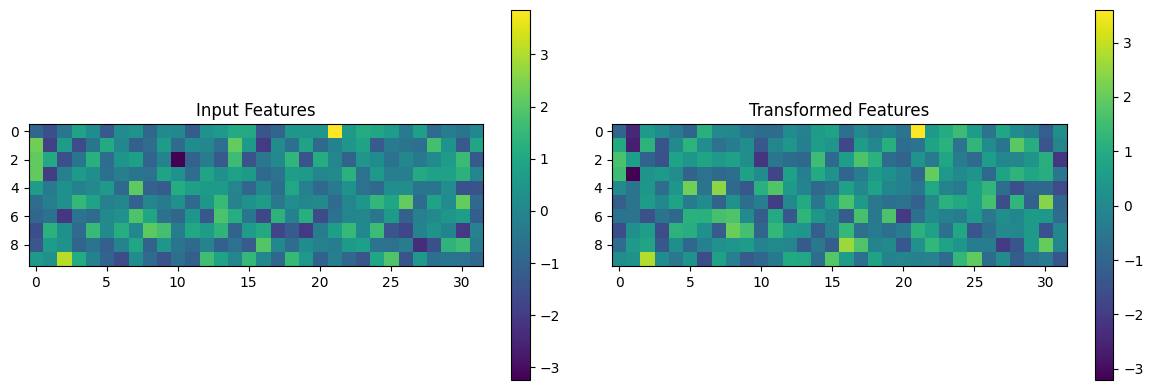

In [14]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Example usage
def transformer_example():
    # Create sample input
    sequence = np.random.randn(1, 10, 32)  # batch_size=1, seq_len=10, embed_dim=32

    # Create transformer block
    transformer = TransformerBlock(embed_dim=32, num_heads=2, ff_dim=64)

    # Apply transformer
    output = transformer(sequence, training=False)

    print("Input shape:", sequence.shape)
    print("Output shape:", output.shape)

    # Visualize transformation
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.imshow(sequence[0], cmap='viridis')
    plt.title('Input Features')
    plt.colorbar()

    plt.subplot(122)
    plt.imshow(output[0], cmap='viridis')
    plt.title('Transformed Features')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

transformer_example()

## Practical Exercises

In [15]:
# Exercise 1: Text Classification with Transformers

def text_classification_exercise():
    # Sample sentences
    sentences = [
        "I love this movie!",
        "This was a terrible experience.",
        "The food was amazing.",
        "I would not recommend this.",
        "Great service and atmosphere."
    ]
    labels = [1, 0, 1, 0, 1]  # 1: positive, 0: negative

    print("Task: Build a transformer for sentiment analysis")
    print("1. Tokenize and encode text")
    print("2. Create transformer model")
    print("3. Train the model")
    print("4. Evaluate performance")

    # Your code here

text_classification_exercise()

Task: Build a transformer for sentiment analysis
1. Tokenize and encode text
2. Create transformer model
3. Train the model
4. Evaluate performance


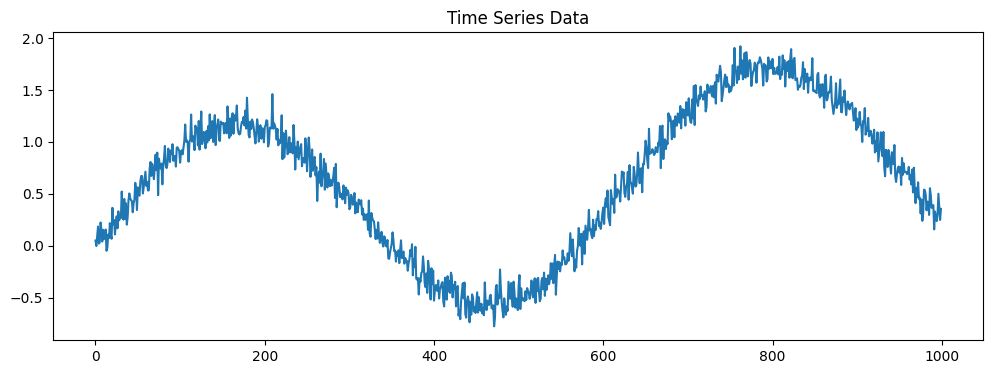

Task: Implement attention for time series
1. Prepare sequence data
2. Create attention model
3. Train and evaluate
4. Visualize attention weights


In [16]:
# Exercise 2: Time Series with Attention

def time_series_attention_exercise():
    # Generate synthetic time series
    np.random.seed(42)
    t = np.linspace(0, 100, 1000)
    series = np.sin(0.1 * t) + np.sin(0.01 * t) + np.random.normal(0, 0.1, len(t))

    plt.figure(figsize=(12, 4))
    plt.plot(series)
    plt.title('Time Series Data')
    plt.show()

    print("Task: Implement attention for time series")
    print("1. Prepare sequence data")
    print("2. Create attention model")
    print("3. Train and evaluate")
    print("4. Visualize attention weights")

    # Your code here

time_series_attention_exercise()

## MCQ Quiz

1. What is the main innovation of transformers?
   - a) RNN architecture
   - b) Self-attention
   - c) CNN architecture
   - d) Dense layers

2. What is the purpose of multi-head attention?
   - a) Faster training
   - b) Multiple representation subspaces
   - c) Reduced memory usage
   - d) Simpler architecture

3. What is positional encoding used for?
   - a) Data normalization
   - b) Sequence order information
   - c) Feature extraction
   - d) Regularization

4. What is the complexity of self-attention?
   - a) O(n)
   - b) O(n²)
   - c) O(n log n)
   - d) O(1)

5. What is layer normalization for?
   - a) Feature scaling
   - b) Training stability
   - c) Sequence ordering
   - d) Memory efficiency

6. What is the feed-forward network in transformers?
   - a) RNN layer
   - b) Dense layers
   - c) CNN layer
   - d) Attention layer

7. What is masked attention used for?
   - a) Feature selection
   - b) Prevent future information leak
   - c) Reduce computation
   - d) Improve accuracy

8. What is the key advantage of transformers over RNNs?
   - a) Less memory usage
   - b) Parallel processing
   - c) Simpler architecture
   - d) Better accuracy

9. What is the purpose of residual connections?
   - a) Feature extraction
   - b) Gradient flow
   - c) Memory efficiency
   - d) Regularization

10. Which is NOT a component of transformer block?
    - a) Multi-head attention
    - b) Feed-forward network
    - c) Layer normalization
    - d) Convolution layer

Answers: 1-b, 2-b, 3-b, 4-b, 5-b, 6-b, 7-b, 8-b, 9-b, 10-d